In [77]:
import random
import numpy as np
import matplotlib.pyplot as plt

def euclidean(a,b):
  return ((a-b)**2).sum() ** 0.5

In [78]:
def kmeans_my(k, points):
  prev_assignment = []
  n_points = points.shape[0]

  centroids = points[np.random.choice(len(points),k,replace=False)]

  for epoch in range(10):
    labels = np.full(n_points,-1)
    for pid,p in enumerate(points):
      min_dist= np.inf
      min_cid = -1
      for cid,c in enumerate(centroids):
        dist = euclidean(p,c)
        if dist < min_dist:
          min_dist = dist
          min_cid = cid
      labels[pid] = min_cid
  
    new_centroids = np.zeros_like(centroids)
    counts = np.zeros(k,dtype= np.int32)

    for l,p in zip(labels,points):
      new_centroids[l] +=p
      counts[l]+= 1
    
    for i in range(k):
        new_centroids[i] /= counts[i]

    if np.array_equal(new_centroids,centroids):
      break
    else:
      centroids = new_centroids
  return labels,centroids
    

In [79]:
k = 3
points = [np.random.randn(k) for _ in range(80)]
points.extend([np.random.randn(k) + np.array([5, 5, 5]) for _ in range(20)])
points.extend([np.random.randn(k) + np.array([10, 5, 0]) for _ in range(20)])
points = np.array(points)

points




array([[ 2.20860769e-01,  1.48398023e+00, -9.34729913e-02],
       [ 9.14450084e-01, -1.33275023e+00, -1.07470317e+00],
       [ 5.42692609e-01,  1.16588304e+00, -2.82852784e-01],
       [-3.23484171e-02, -6.62603175e-01,  1.26019858e-01],
       [-1.04300263e-01,  1.58232636e+00,  5.89612830e-01],
       [-6.66407733e-01,  1.97777146e+00, -2.07221879e+00],
       [ 2.65218562e-01,  7.50217967e-01,  1.08984735e-02],
       [ 4.75717487e-01,  7.20402841e-01,  9.87337780e-02],
       [ 1.17207974e+00, -2.75762001e-01, -1.14186806e+00],
       [ 6.74041003e-01,  1.86730438e-01,  3.58587149e-01],
       [-9.36895121e-01,  8.42555887e-02,  7.75263254e-01],
       [-2.02298746e+00, -2.34979570e-01,  2.21891984e+00],
       [ 1.02898062e+00,  2.70472145e-01, -1.17221533e+00],
       [-2.96709347e-01,  9.87369130e-01, -3.16385749e-01],
       [ 2.84291042e-01,  1.11449516e+00,  8.69536134e-01],
       [ 1.16924190e+00, -1.67801696e+00, -5.57382605e-01],
       [-4.38775651e-01, -1.47711106e+00

In [80]:
labels,centroids = kmeans_my(k,points)
print(labels)
print(centroids)

[0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1
 0 1 1 1 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
[[-0.60164667  0.93161512  0.34407618]
 [ 0.32031246 -0.68772409 -0.15543526]
 [ 7.26222981  5.10855447  2.57959985]]


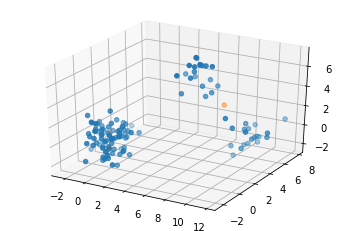

In [81]:
labels,centroids = kmeans_my(k,points)
fig = plt.figure()
ax = fig.gca(projection ='3d')

ax.scatter(points[:,0],points[:,1],points[:,2])
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2])
plt.show()

In [82]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


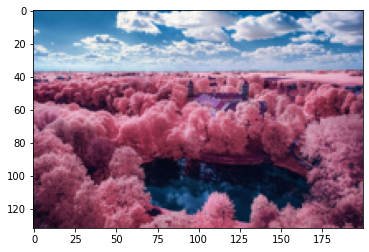

In [83]:
from PIL import Image
im = Image.open("/content/gdrive/MyDrive/picture.jpg")
width = 200
height = im.height * width// im.width
im = im.resize((width,height))
plt.imshow(im)
plt.show()

In [84]:
np.array(im)

array([[[ 31, 113, 163],
        [ 29, 111, 161],
        [ 28, 109, 162],
        ...,
        [106, 133, 176],
        [ 93, 123, 167],
        [ 71, 106, 153]],

       [[ 30, 112, 162],
        [ 29, 111, 161],
        [ 29, 110, 162],
        ...,
        [145, 160, 198],
        [129, 148, 189],
        [ 88, 119, 161]],

       [[ 29, 110, 164],
        [ 27, 108, 162],
        [ 26, 107, 161],
        ...,
        [140, 154, 193],
        [113, 133, 176],
        [ 97, 124, 166]],

       ...,

       [[ 36,  15,  38],
        [ 42,  17,  41],
        [ 51,  20,  45],
        ...,
        [ 42,  16,  40],
        [ 37,  12,  36],
        [ 65,  26,  55]],

       [[ 43,  16,  41],
        [ 55,  21,  48],
        [ 46,  19,  42],
        ...,
        [ 73,  29,  54],
        [ 56,  22,  46],
        [ 64,  26,  52]],

       [[ 46,  19,  44],
        [ 54,  22,  49],
        [ 38,  18,  39],
        ...,
        [117,  52,  82],
        [ 96,  39,  65],
        [ 84,  36,  61]]

In [85]:
pixels = np.array(im).reshape(-1,3)

In [93]:
pixels=pixels.astype(np.float32)


In [94]:
labels , centroids = kmeans_my(3,pixels)

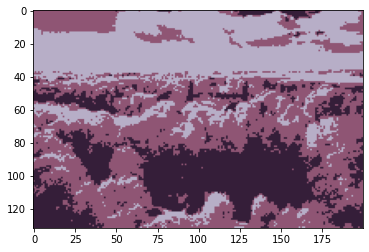

In [100]:
centroids = centroids.astype(np.int32)

for l,pid in zip(labels,range(pixels.shape[0])):
  pixels[pid] = centroids[l]

Image_remaster = Image.fromarray(pixels.reshape((height,width,3)).astype(np.int8),'RGB')
plt.imshow(Image_remaster)
plt.show()
